<a href="https://colab.research.google.com/github/mcmcmax437/CourseWork_clustering/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22Untitled0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pand
import numpy as nump

import matplotlib.pyplot as matpl
import seaborn as sborn

import plotly as plot
import plotly.graph_objs as go



plot.offline.init_notebook_mode(connected=True)


### Начало
Вставляем датасет и узнаем параметры массива

In [61]:
data = pand.read_csv('HouseSales.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [62]:
data.shape

(21613, 21)

Находим рамки допустимы данных


In [63]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Так, ну с данными у нас все хорошо + нету никаких нулевых значений

### Если значения надо подправить


In [66]:
data.drop(["date", "id", "zipcode", "condition", "lat", "long"], axis=1, inplace=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 2.5 MB


### Анализируем конкретные данные

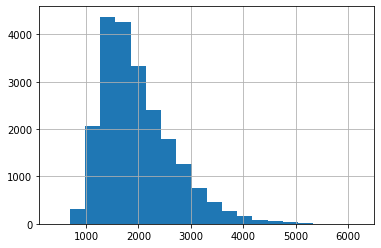

In [68]:
data['sqft_living15'].hist(bins=20)

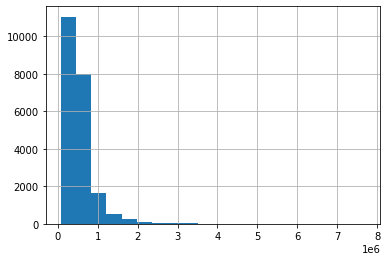

In [69]:
data['price'].hist(bins=20)

In [ ]:
sorted(data['price'], reverse= True)

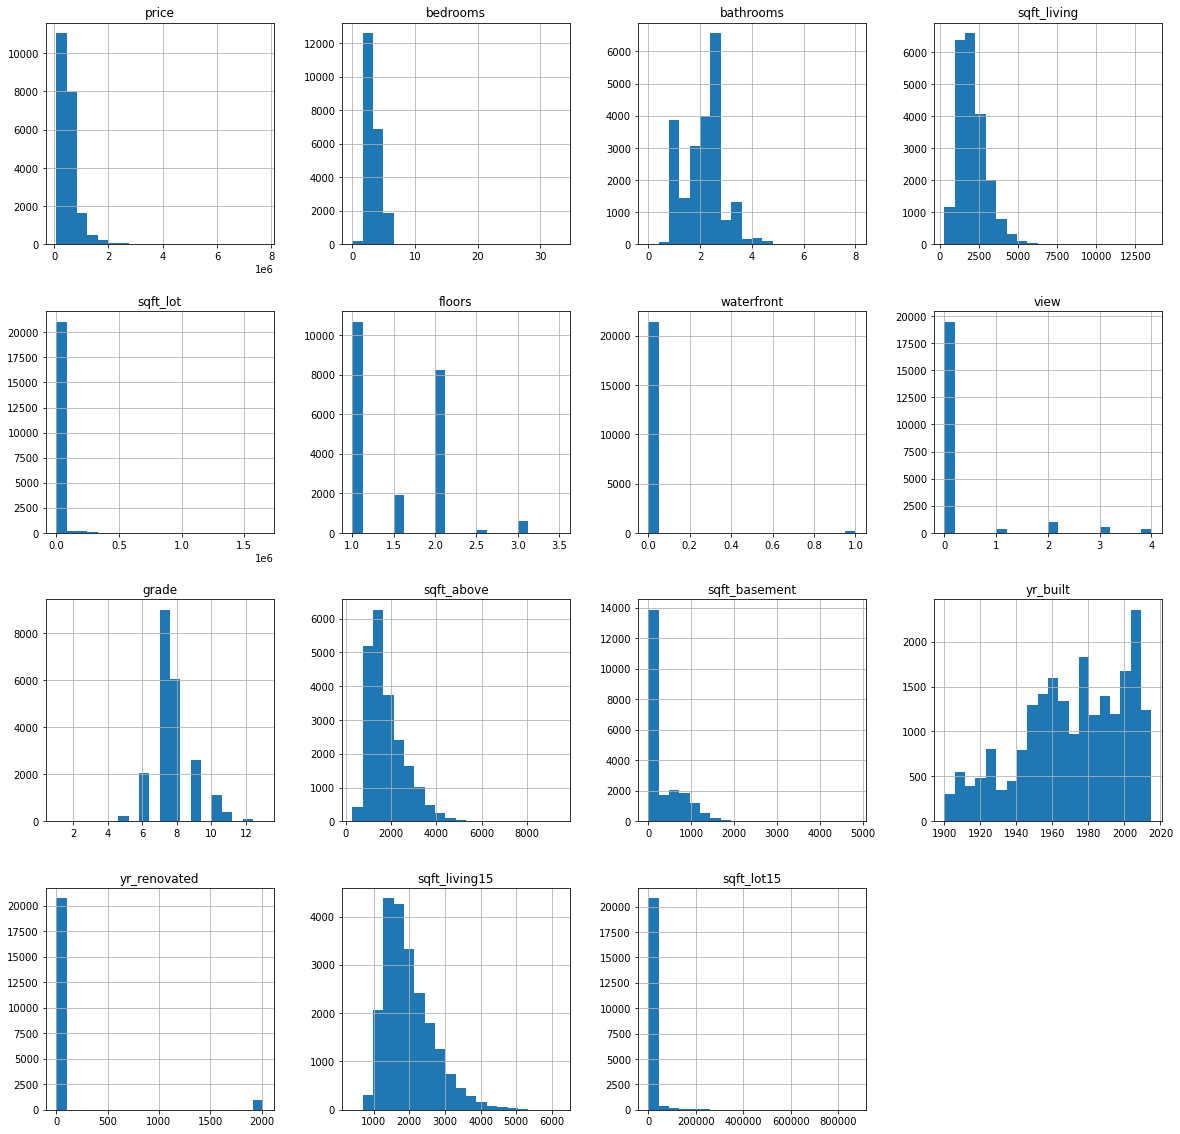

In [71]:
matpl.rcParams["figure.figsize"] = (20, 20)
data.hist(bins=20)
matpl.show()

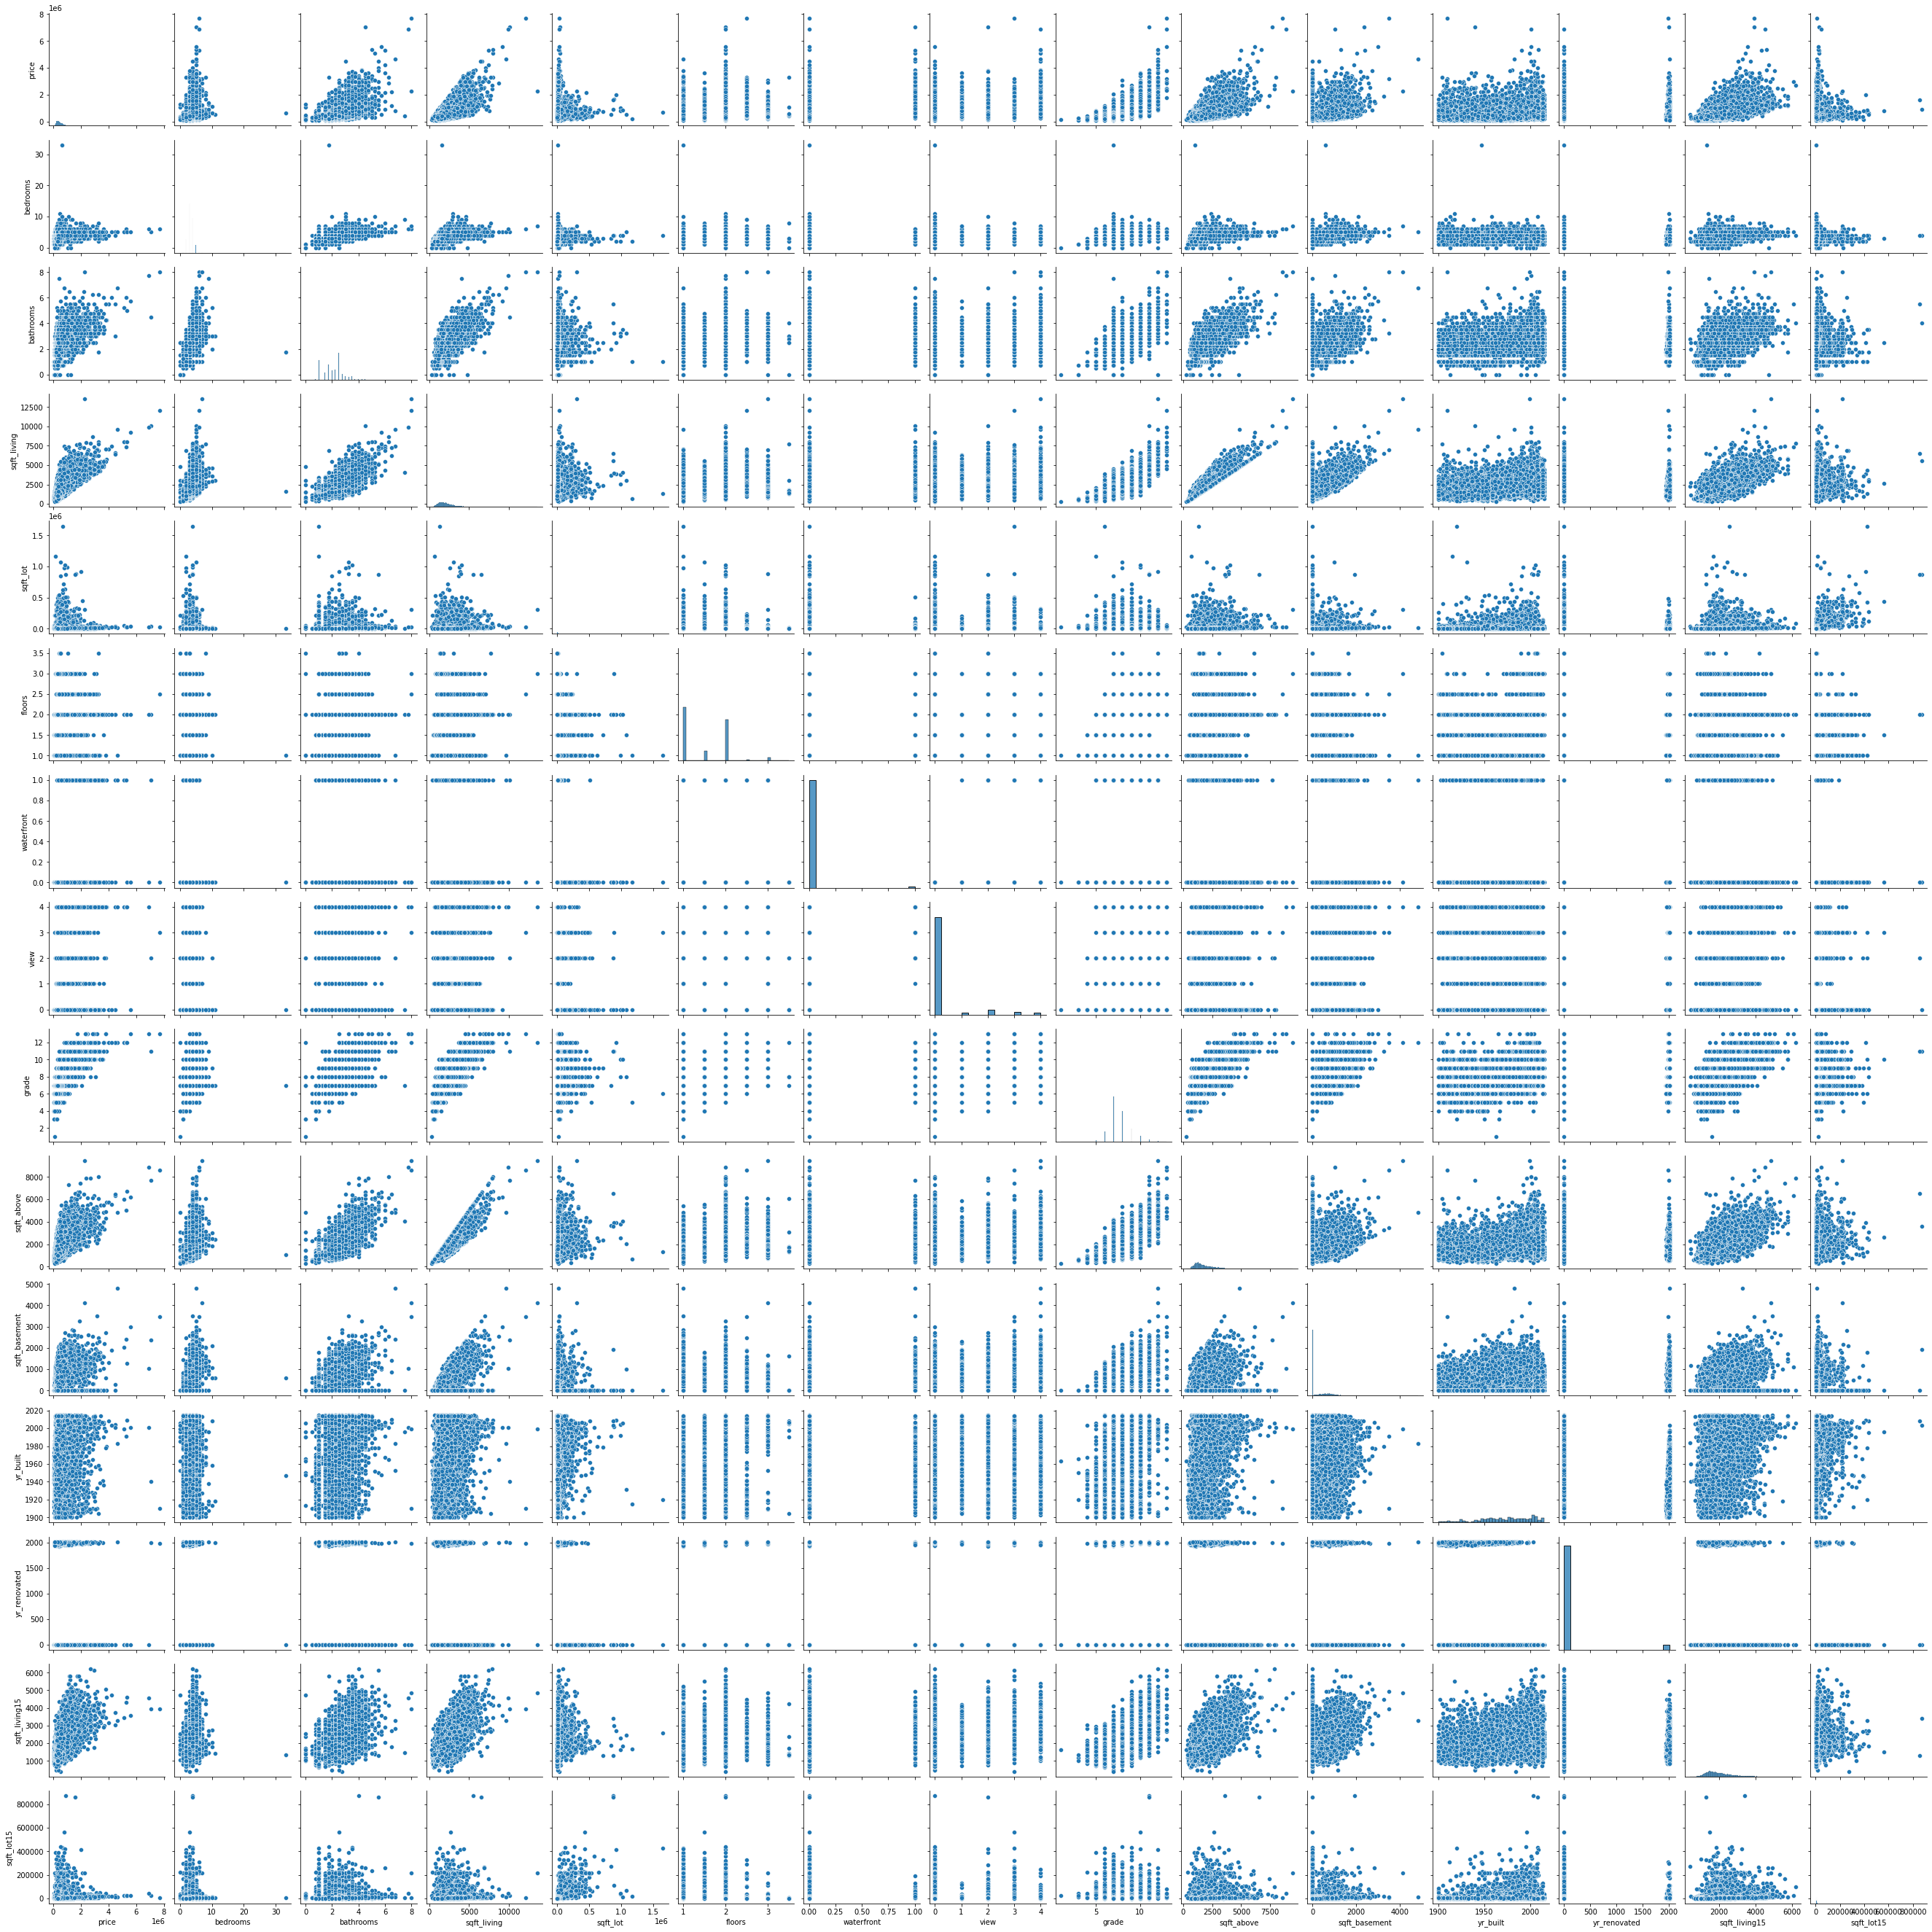

In [72]:
sborn.pairplot(data)
matpl.show()

Применим кореляционную технику да бы проанализировать совместимость данных 

In [73]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
data = pand.DataFrame(rs.fit_transform(data), columns=data.columns)

In [74]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

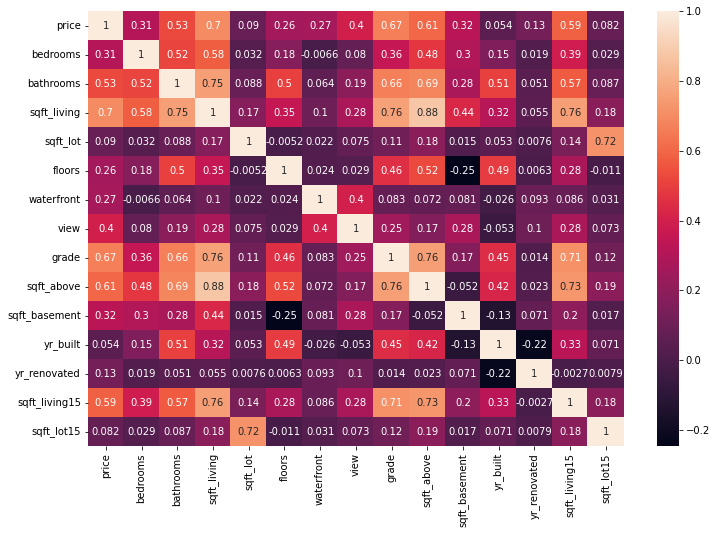

In [75]:
matpl.figure(figsize=(12,8))
ax = sborn.heatmap(data.corr(), annot=True)
matpl.show()

### Метод Локтя для поиска оптимального значени К


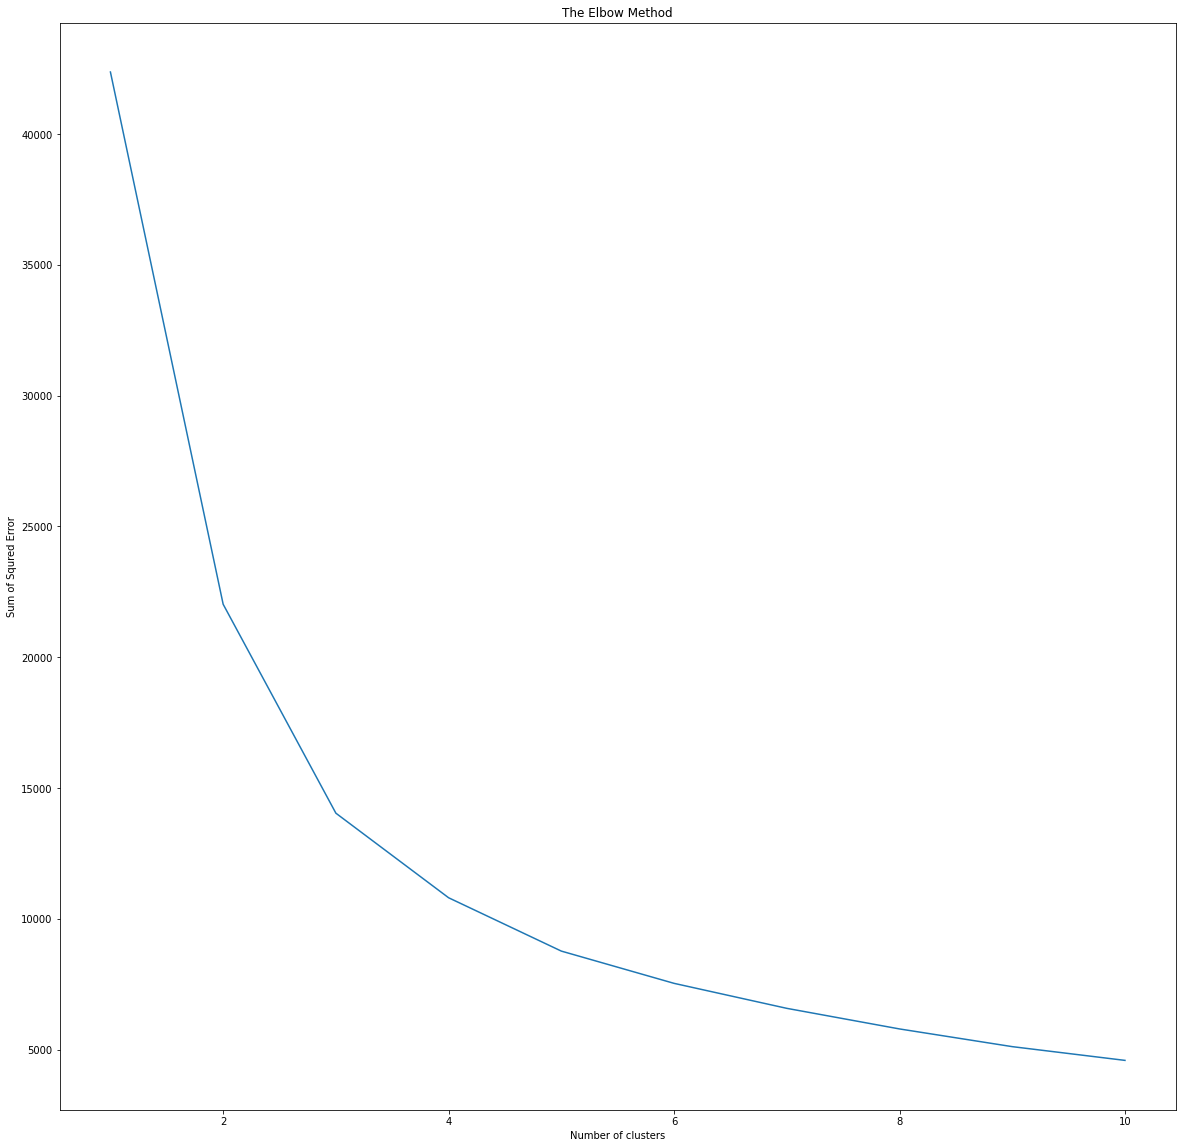

In [76]:
from sklearn.cluster import KMeans
cluster = []
for i in range(1,11):
  km = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  km.fit(data[['price', 'sqft_living']])
  cluster.append(km.inertia_)
matpl.plot(range(1,11),cluster)
matpl.title('The Elbow Method')
matpl.xlabel('Number of clusters')
matpl.ylabel('Sum of Squred Error')
matpl.show()


In [77]:
cluster

[42367.505835940334,
 22025.49822647348,
 14040.021770013467,
 10807.572681405083,
 8768.686403918451,
 7535.976571411879,
 6580.789952696364,
 5793.506544907569,
 5116.988154796967,
 4591.8709136615]

### К - means 
Кластеризация К средних без предворительного нахождения количества класстеров 


In [96]:
from sklearn.cluster import KMeans

kmeans = KMeans(4)
kmeans

KMeans(n_clusters=4)

In [97]:
pred = kmeans.fit_predict(data)
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

In [98]:
data['K_means_Cluster'] = pred
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,K_means_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,-0.706083,0.0,-1.666667,-0.650045,-0.348442,-0.5,0.0,0.0,0.0,-0.372549,0.000000,-0.434783,0.0,-0.574713,-0.395344,0,2,0
1,0.272404,0.0,0.000000,0.587711,-0.066572,0.5,0.0,0.0,0.0,0.598039,0.714286,-0.521739,1991.0,-0.172414,0.003813,1,1,1
2,-0.835784,-1.0,-1.666667,-1.015138,0.421742,-0.5,0.0,0.0,-1.0,-0.774510,0.000000,-0.913043,0.0,1.011494,0.088702,0,2,0
3,0.476706,1.0,1.000000,0.044524,-0.463527,-0.5,0.0,0.0,0.0,-0.500000,1.625000,-0.217391,0.0,-0.551724,-0.525788,0,2,0
4,0.185730,0.0,-0.333333,-0.204809,0.081799,-0.5,0.0,0.0,1.0,0.117647,0.000000,0.260870,0.0,-0.045977,-0.023480,0,2,0


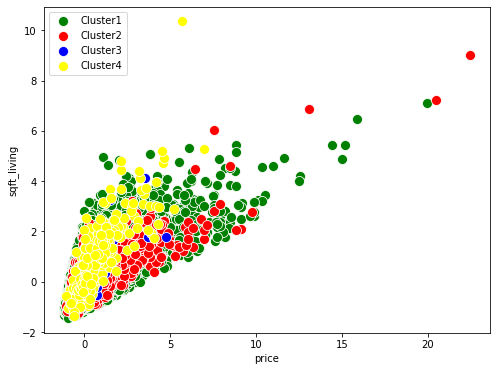

In [99]:
df1 = data[data['K_means_Cluster']==0]
df2 = data[data['K_means_Cluster']==1]
df3 = data[data['K_means_Cluster']==2]
df4 = data[data['K_means_Cluster']==3]

matpl.figure(figsize=(8, 6))

sborn.scatterplot(x='price', y='sqft_living', s=100, data=df1, color='green', label = 'Cluster1')
sborn.scatterplot(x='price', y='sqft_living', s=100, data=df2, color='red', label = 'Cluster2')
sborn.scatterplot(x='price', y='sqft_living', s=100, data=df3, color='blue', label = 'Cluster3')
sborn.scatterplot(x='price', y='sqft_living', s=100, data=df4, color='yellow', label = 'Cluster4')



matpl.xlabel('price')
matpl.ylabel('sqft_living')
matpl.legend()
matpl.show()

In [83]:
kmeans.cluster_centers_

array([[ 9.60777061e-01,  4.52954048e-01,  6.52808169e-02,
         3.65711179e-01,  1.59625200e+00,  1.03938731e-02,
         4.59518600e-02,  6.13785558e-01,  7.35229759e-01,
         3.13459476e-01,  7.87437480e-01, -7.71144515e-01,
         1.99582713e+03,  1.58121432e-01,  1.23973128e+00],
       [ 2.39074660e-01,  3.67207599e-01, -2.02767333e-01,
         1.24790180e-01,  4.62300272e-01, -7.79240055e-03,
         5.88759153e-03,  2.11656442e-01,  6.38135761e-01,
         2.01401371e-01,  5.08410668e-01, -6.29554978e-02,
         1.81898940e-12,  1.56067466e-01,  3.70942622e-01],
       [ 9.32840370e-01,  1.83673469e-01,  4.42176871e-01,
         8.26812292e-01,  1.02087512e+02,  1.42857143e-01,
         2.04081633e-02,  1.00000000e+00,  1.32653061e+00,
         1.01614646e+00,  4.32215743e-01,  1.54392192e-01,
         7.10542736e-14,  3.09171945e-01,  4.21580558e+01],
       [ 6.19010424e-01,  3.88127854e-01,  2.73211568e-01,
         8.51183433e-01,  2.93435831e+01,  4.10958904

### Hierarchial (Agglomerative Clustering)

In [84]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [85]:
points = data[['price', 'sqft_living']]

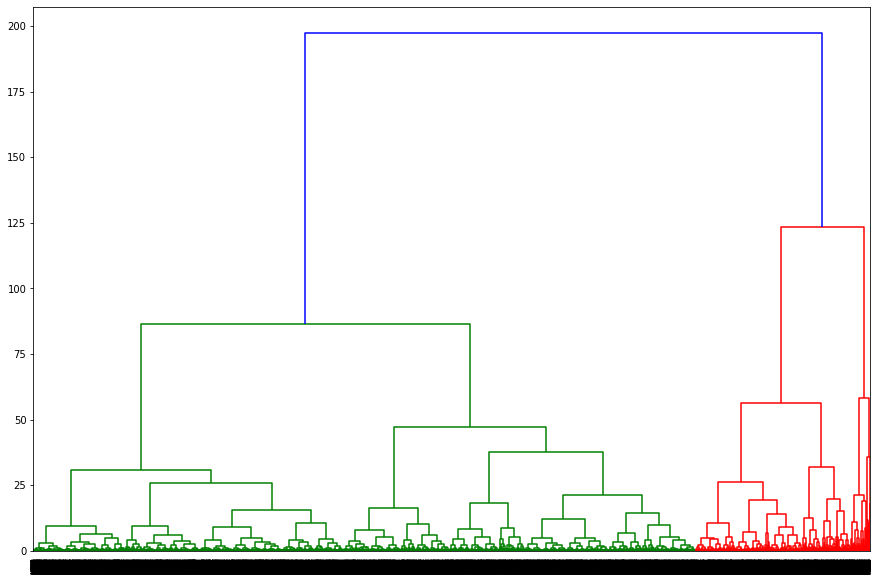

In [86]:
fig = matpl.figure(figsize=(15,10))

dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))

In [100]:
hc = AgglomerativeClustering(3)
hc

AgglomerativeClustering(n_clusters=3)

In [101]:
pred = hc.fit_predict(data)
pred

array([2, 1, 2, ..., 2, 2, 2])

In [102]:
data['Hierarchical_Cluster'] = pred
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,K_means_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,-0.706083,0.0,-1.666667,-0.650045,-0.348442,-0.5,0.0,0.0,0.0,-0.372549,0.000000,-0.434783,0.0,-0.574713,-0.395344,0,2,0
1,0.272404,0.0,0.000000,0.587711,-0.066572,0.5,0.0,0.0,0.0,0.598039,0.714286,-0.521739,1991.0,-0.172414,0.003813,1,1,1
2,-0.835784,-1.0,-1.666667,-1.015138,0.421742,-0.5,0.0,0.0,-1.0,-0.774510,0.000000,-0.913043,0.0,1.011494,0.088702,0,2,0
3,0.476706,1.0,1.000000,0.044524,-0.463527,-0.5,0.0,0.0,0.0,-0.500000,1.625000,-0.217391,0.0,-0.551724,-0.525788,0,2,0
4,0.185730,0.0,-0.333333,-0.204809,0.081799,-0.5,0.0,0.0,1.0,0.117647,0.000000,0.260870,0.0,-0.045977,-0.023480,0,2,0


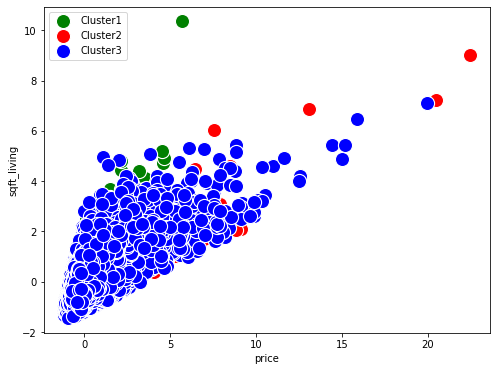

In [105]:
dt1 = data[data['Hierarchical_Cluster']==0]
dt2 = data[data['Hierarchical_Cluster']==1]
dt3 = data[data['Hierarchical_Cluster']==2]


matpl.figure(figsize=(8, 6))

sborn.scatterplot(x='price', y='sqft_living', s=200, data=dt1, color='green', label = 'Cluster1')
sborn.scatterplot(x='price', y='sqft_living', s=200, data=dt2, color='red', label = 'Cluster2')
sborn.scatterplot(x='price', y='sqft_living', s=200, data=dt3, color='blue', label = 'Cluster3')


matpl.xlabel('price')
matpl.ylabel('sqft_living')

matpl.show()

### DBSCAN (Density - Based)

In [106]:
from sklearn.cluster import DBSCAN

In [107]:
dbscan = DBSCAN(3)
dbscan

DBSCAN(eps=3)

In [108]:
model = dbscan.fit_predict(data)
model

array([0, 1, 0, ..., 0, 0, 0])

In [109]:
data['DBSCAN_Cluster'] = model
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,K_means_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,-0.706083,0.0,-1.666667,-0.650045,-0.348442,-0.5,0.0,0.0,0.0,-0.372549,0.000000,-0.434783,0.0,-0.574713,-0.395344,0,2,0
1,0.272404,0.0,0.000000,0.587711,-0.066572,0.5,0.0,0.0,0.0,0.598039,0.714286,-0.521739,1991.0,-0.172414,0.003813,1,1,1
2,-0.835784,-1.0,-1.666667,-1.015138,0.421742,-0.5,0.0,0.0,-1.0,-0.774510,0.000000,-0.913043,0.0,1.011494,0.088702,0,2,0
3,0.476706,1.0,1.000000,0.044524,-0.463527,-0.5,0.0,0.0,0.0,-0.500000,1.625000,-0.217391,0.0,-0.551724,-0.525788,0,2,0
4,0.185730,0.0,-0.333333,-0.204809,0.081799,-0.5,0.0,0.0,1.0,0.117647,0.000000,0.260870,0.0,-0.045977,-0.023480,0,2,0


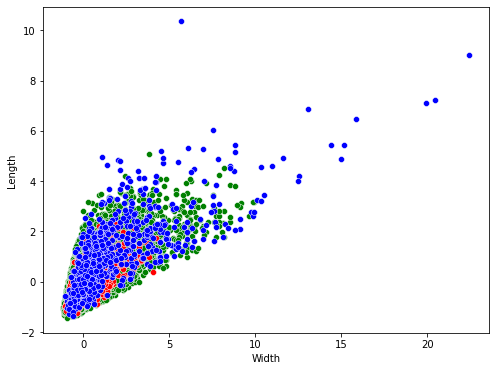

In [95]:
dt1 = data[data['DBSCAN_Cluster']==0]
dt2 = data[data['DBSCAN_Cluster']==1]
dt3 = data[data['DBSCAN_Cluster']==-1]

matpl.figure(figsize=(8, 6))

sborn.scatterplot(x='price', y='sqft_living', data=dt1, color='green')
sborn.scatterplot(x='price', y='sqft_living', data=dt2, color='red')
sborn.scatterplot(x='price', y='sqft_living', data=dt3, color='blue')

matpl.xlabel('Width')
matpl.ylabel('Length')

matpl.show()

### Umap


In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)


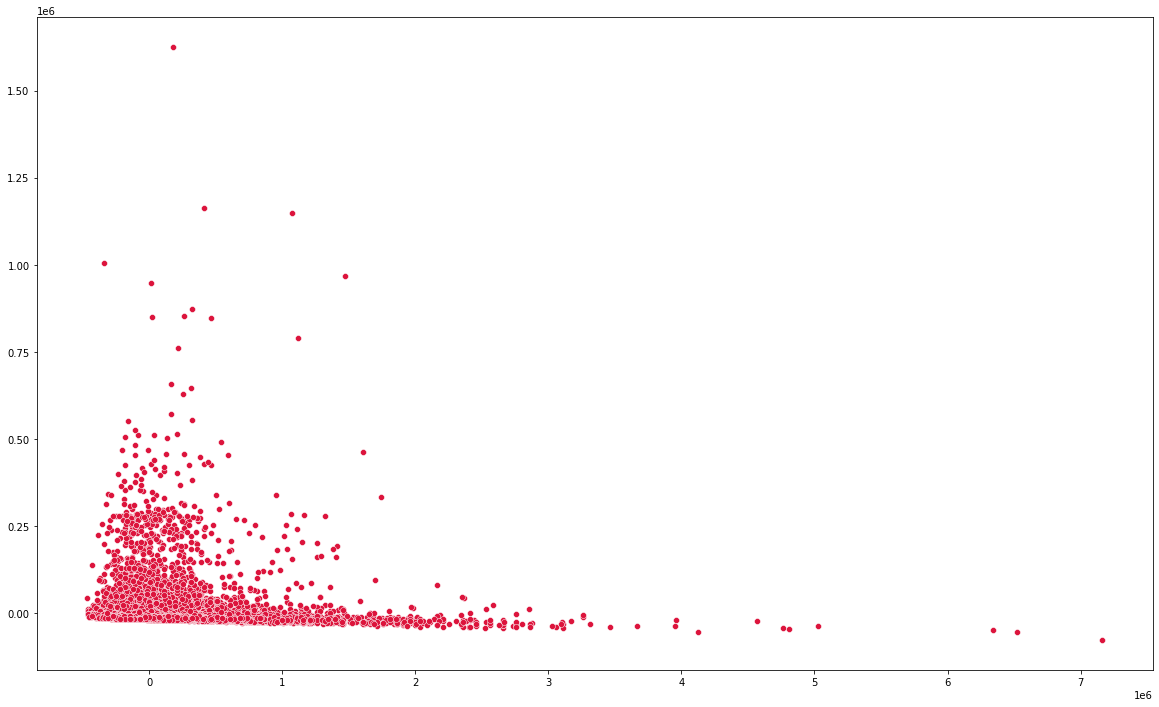

In [36]:
matpl.figure(figsize=(20,12))
sborn.scatterplot(x=pca_data[:,0], y=pca_data[:,1], color="crimson")
matpl.show()

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE()
tsne_data = tsne.fit_transform(data)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



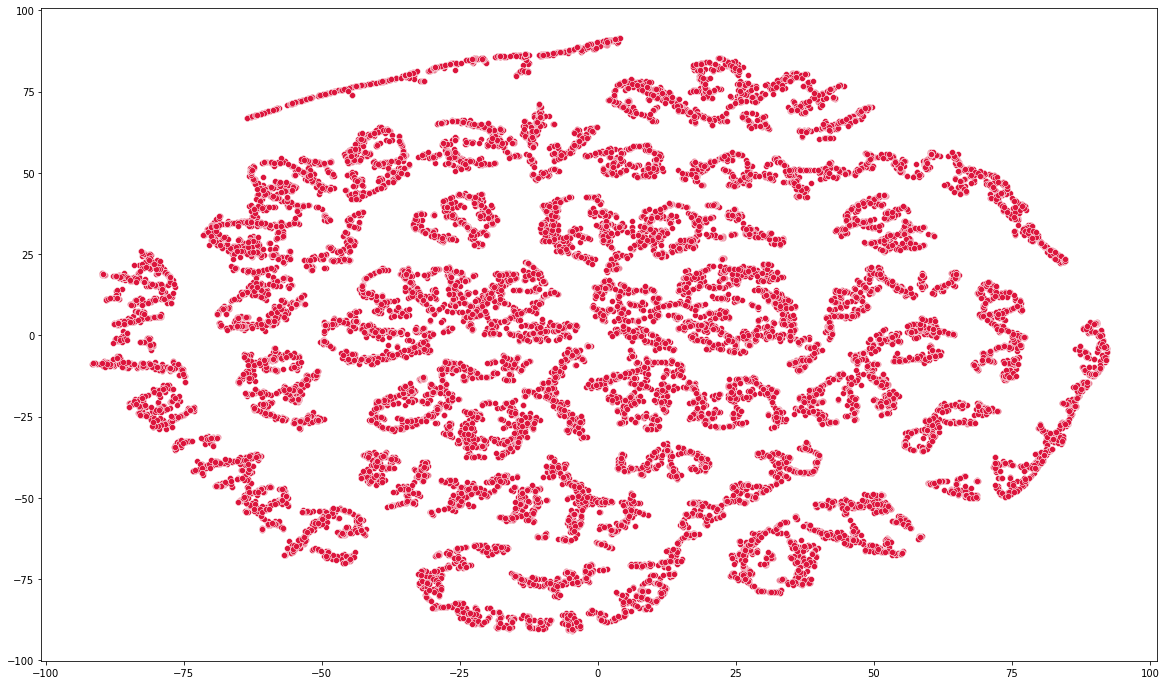

In [38]:
matpl.figure(figsize=(20,12))
sborn.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], color="crimson")
matpl.show()

In [45]:
from sklearn.cluster import DBSCAN

In [51]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
data = pand.DataFrame(rs.fit_transform(data), columns=data.columns)

In [52]:
dbscan = DBSCAN(eps=1.2, min_samples=50).fit(data)


In [53]:
pand.Series(dbscan.labels_).unique()



array([ 0, -1])

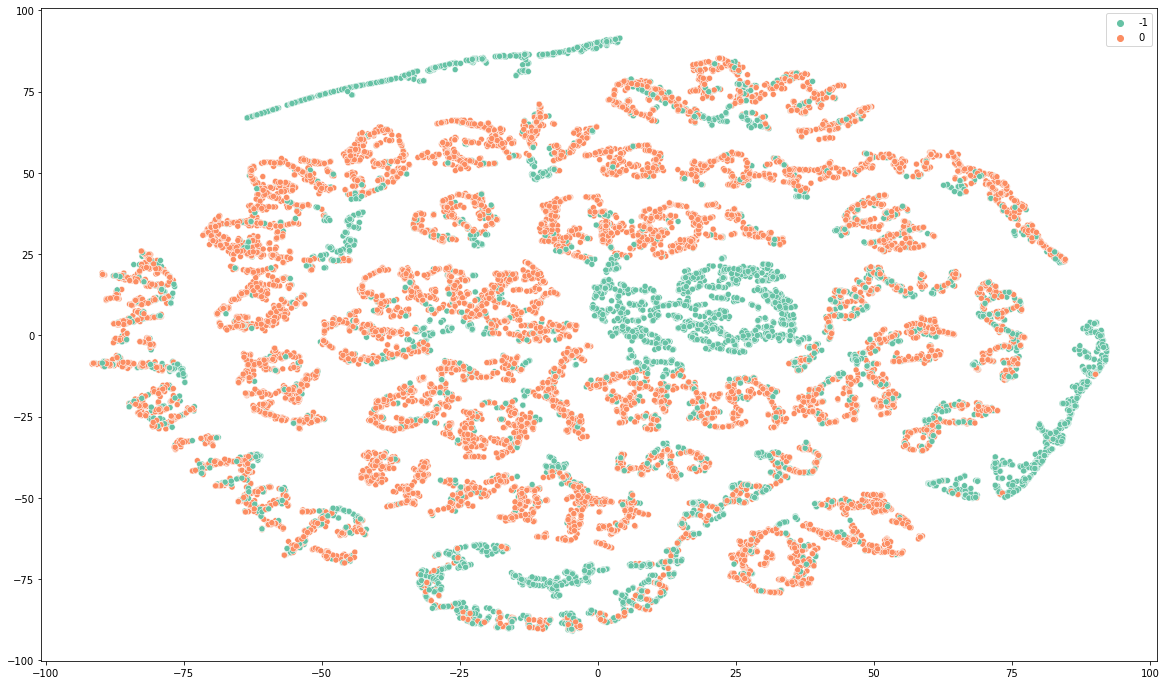

In [54]:
matpl.figure(figsize=(20,12))
sborn.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=dbscan.labels_, palette="Set2")
matpl.show()